In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import heapq
from pathlib import Path
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
import warnings
sns.set_palette("pastel", 9)
#husl

In [3]:
df_train = pd.read_csv(Path("adults_data","adults_cleaned_train_data.csv"))
df_test = pd.read_csv(Path("adults_data","adults_cleaned_test_data.csv"))

In [121]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [20]:
def save(title):
    plt.savefig(f'report/images/{title}.pdf', format='pdf')

In [43]:
def count_sth_grouped(data, value_up, column, compare_column, title,
                      relation='equal', value_down=None, ax=None, rotat=60,
                      hue_col=None):
    
    if hue_col is None:
        data = data[[column, compare_column]]
    else:
        data = data[[column, compare_column, hue_col]]
    
    if relation == 'equal':
        df_reduced = data[data[column] == value_up]
    if relation == 'lower':
        df_reduced = data[data[column] <= value_up]
    if relation == 'greater':
        df_reduced = data[data[column] >= value_up]
    if relation == 'between':
        df_reduced = data[(data[column] <= value_up) & (data[column] > value_down)]
    
        
    
    if hue_col is None:
        df_reduced = df_reduced.groupby([compare_column]).count()
        df_reduced = df_reduced.reset_index()
        cnt_plot = sns.barplot(df_reduced, x=compare_column, y=column, ax=ax,
                               errorbar=None, palette="Greens")
    else:
        df_reduced = df_reduced.groupby([compare_column, hue_col]).count()
        df_reduced = df_reduced.reset_index()
        cnt_plot = sns.barplot(df_reduced, x=compare_column, y=column, hue=hue_col, ax=ax,
                               errorbar=None, palette="Greens")
        
    for p in cnt_plot.patches:
        if p.get_height() != 0:  
            cnt_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')
    
    #cnt_plot.set_xticks(range(len(df_reduced[compare_column])))
    #cnt_plot.set_xticklabels(df_reduced[compare_column], rotation=rotat)

    cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
    cnt_plot.set_ylabel("count")
    cnt_plot.set_title(title) #wroc
    plt.tight_layout()

In [130]:
def draw_subplots_high(data, compare_column, rotat_value, hue_col=None, 
                       horiz_space=1, sub_hight=8):

    fig, axes = plt.subplots(2,2, figsize=(16,sub_hight))

    #plt.suptitle("Suspiciously high values of working hours", fontweight = "bold")

    count_sth_grouped(data, 99, 'hours-per-week', compare_column, "99",
                    'equal', ax=axes[0,0], rotat=rotat_value, hue_col=hue_col)
    
    count_sth_grouped(data, 100, 'hours-per-week', compare_column, "96-99",
                    'between', 95, ax=axes[0,1], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(data, 95, 'hours-per-week', compare_column, "91-95",
                    'between', 90, ax=axes[1,0], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(data, 90, 'hours-per-week', compare_column, "81-90",
                    'between', 80, ax=axes[1,1], rotat=rotat_value, hue_col=hue_col)

    """count_sth_grouped(data, 80, 'hours-per-week', compare_column, "71-80",
                    'between', 70, ax=axes[2,0], rotat=rotat_value, hue_col=hue_col)"""

    plt.subplots_adjust(hspace=horiz_space)

C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)


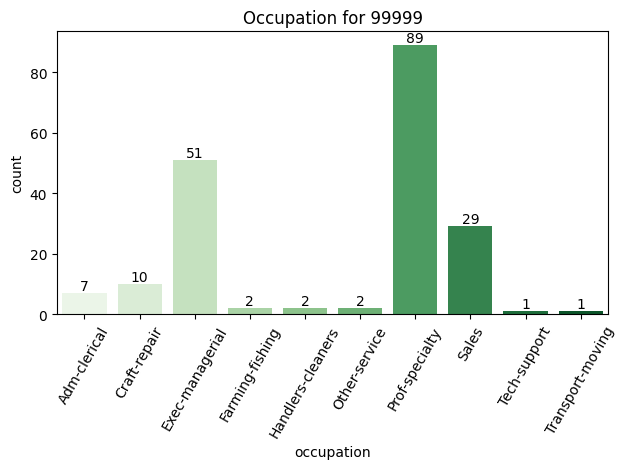

In [122]:
count_sth_grouped(df_train, 99999, 'capital', 'occupation', "Occupation for 99999",
                  relation = 'equal')

# high amount of time spent at work

C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)


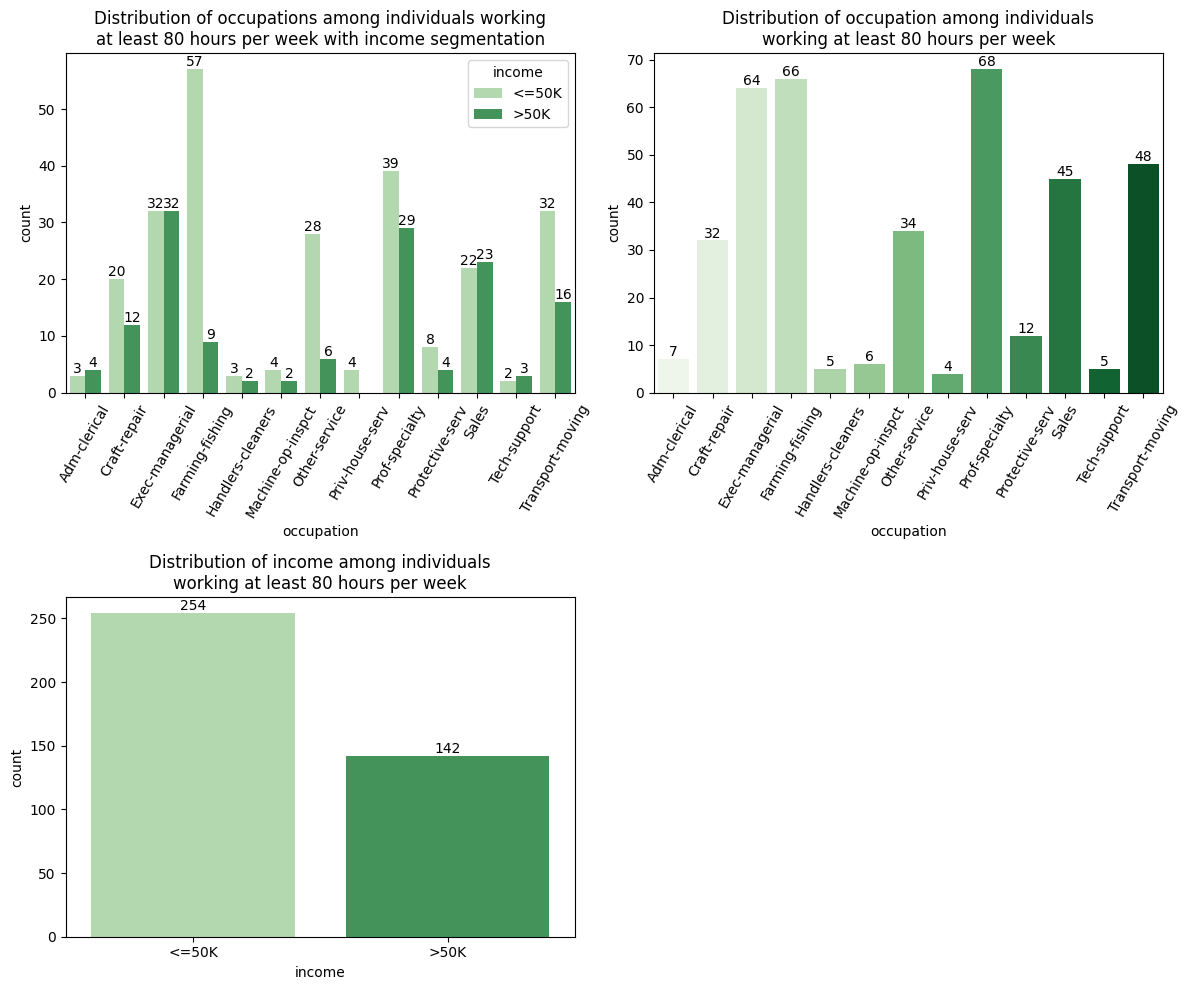

In [123]:
fig, axes = plt.subplots(2,2, figsize=(12,10))
fig.delaxes(axes[1,1])  # Usunięcie ostatniego subplotu

count_sth_grouped(df_train, 80, 'hours-per-week', 'occupation', 
                  title="Distribution of occupations among individuals working\nat least 80 hours per week with income segmentation",
                  relation='greater', hue_col="income", ax=axes[0,0])
count_sth_grouped(df_train, 80, 'hours-per-week', 'income', 
                  title="Distribution of income among individuals\nworking at least 80 hours per week",
                  relation='greater', ax=axes[1,0], rotat=0)

count_sth_grouped(df_train, 80, 'hours-per-week', 'occupation', 
                  title="Distribution of occupation among individuals\nworking at least 80 hours per week",
                  relation='greater', ax=axes[0,1], rotat=60)

plt.tight_layout()
save('hours80')

C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_p

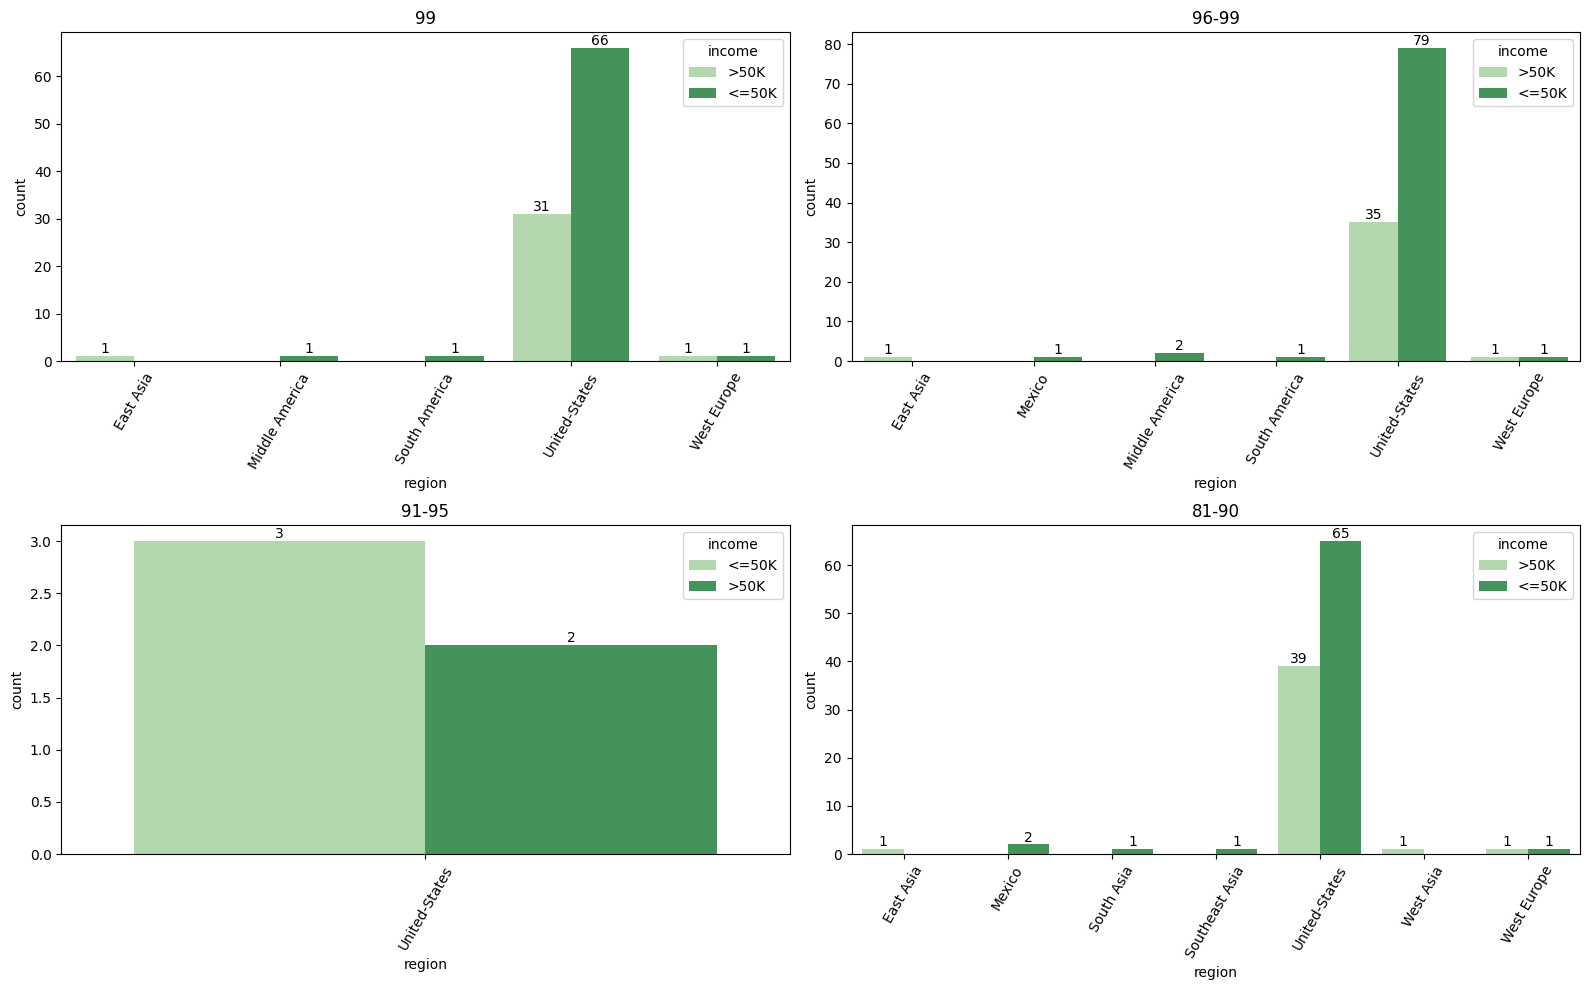

In [144]:
draw_subplots_high(df_train,'region',60, hue_col="income", sub_hight=10, horiz_space=0.5) #wroc
save('region80.pdf')

C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_p

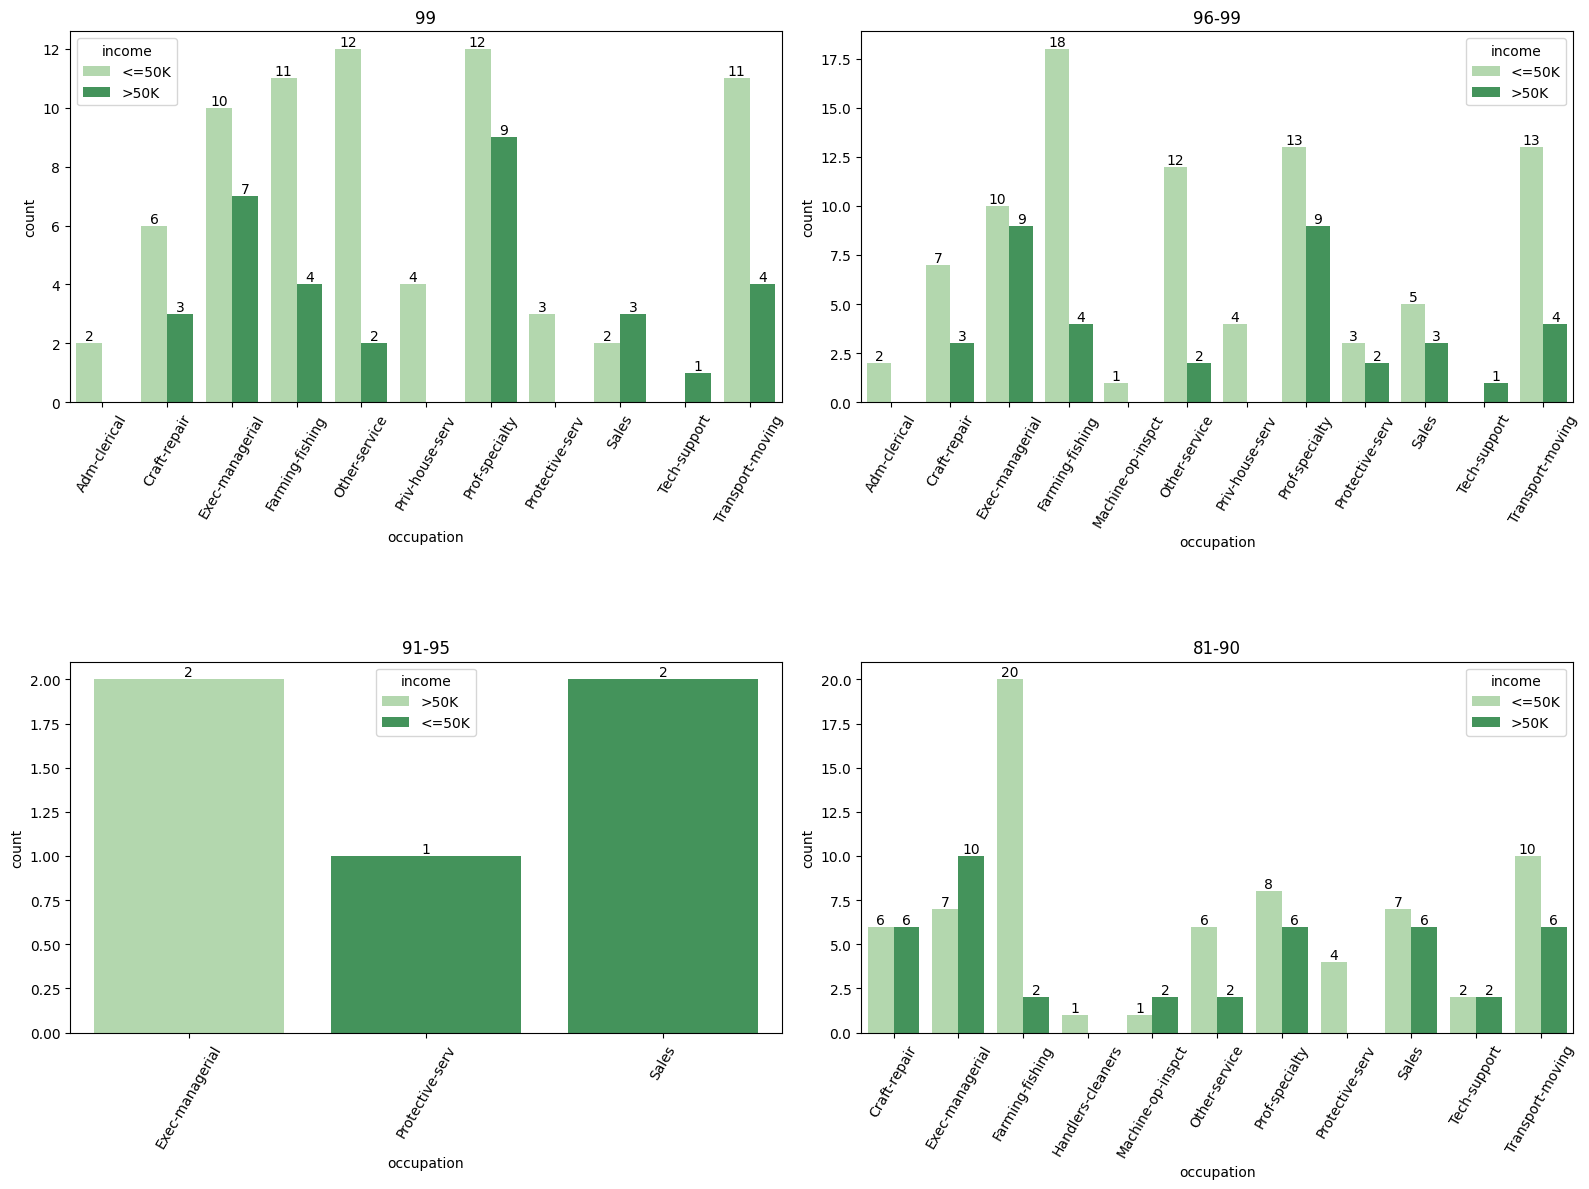

In [146]:
draw_subplots_high(df_train, "occupation", 60, sub_hight=12, horiz_space=0.7,
                hue_col="income")
save('high_occup_sub')

C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_p

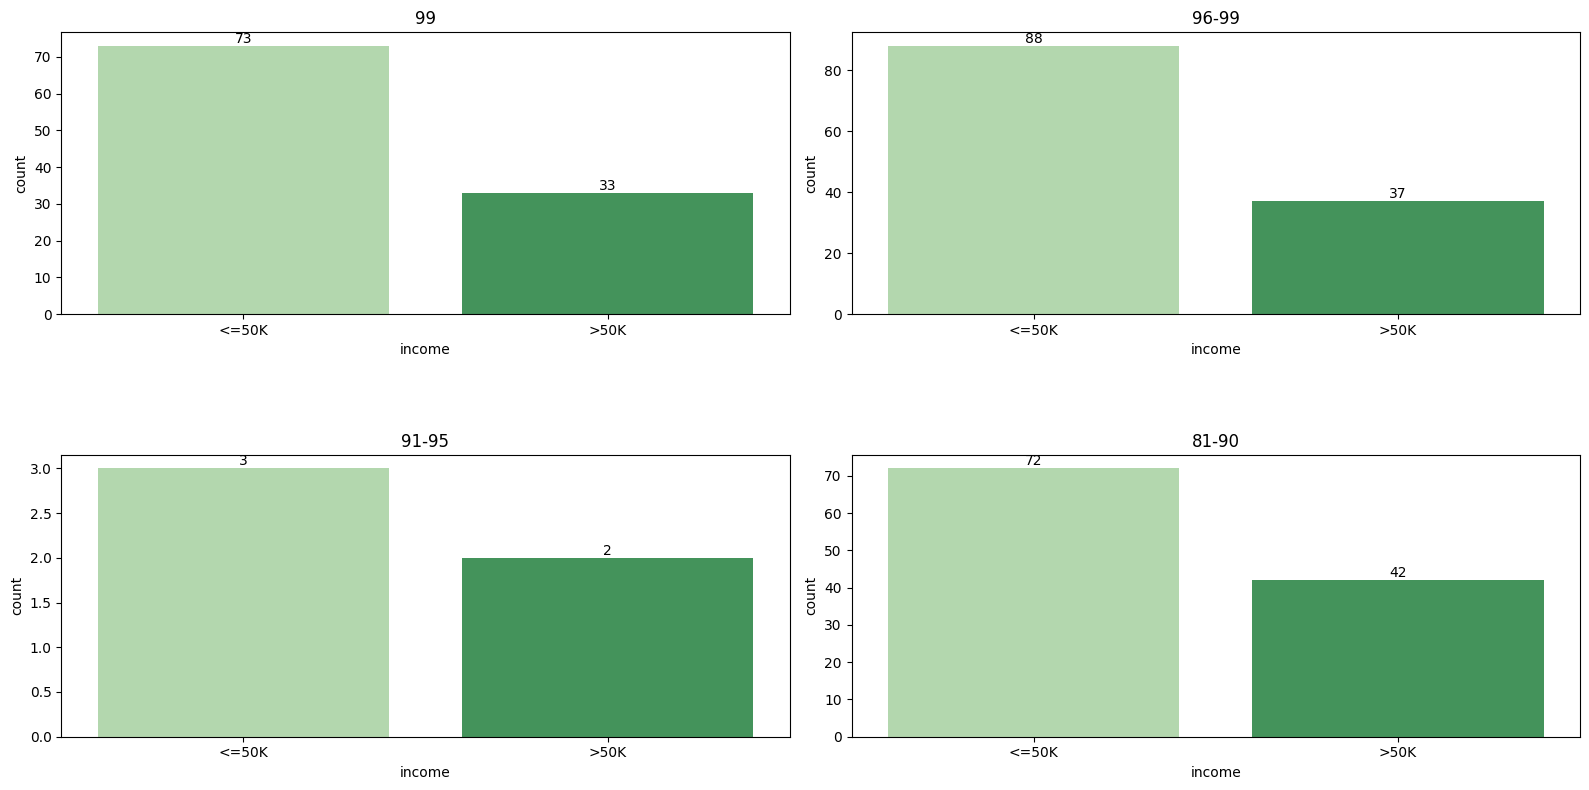

In [148]:
draw_subplots_high(df_train,"income", 0, horiz_space=0.5)

# low

In [158]:
def draw_subplots_low(data, compare_column, rotat_value, hue_col=None,
                      horiz_space=1, sub_height=13):

    fig, axes = plt.subplots(3,2, figsize=(12,sub_height))
    fig.delaxes(axes[2,1])  # Usunięcie ostatniego subplotu
    #plt.suptitle("Suspiciously low values of working hours", fontweight = "bold")

    count_sth_grouped(data, 1, 'hours-per-week', compare_column, "1",
                    'equal',ax=axes[0,0], rotat=rotat_value, hue_col=hue_col)
    
    count_sth_grouped(data, 5, 'hours-per-week', compare_column, "1-5",
                    'between', -1, ax=axes[0,1], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(data, 10, 'hours-per-week', compare_column, "6-10",
                    'between', 5, ax=axes[1,0], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(data, 15, 'hours-per-week', compare_column, "11-15",
                    'between', 10, ax=axes[1,1], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(data, 25, 'hours-per-week', compare_column, "16-25",
                    'between', 15, ax=axes[2,0], rotat=rotat_value, hue_col=hue_col)

    """count_sth_grouped(data, 0, 'hours-per-week', compare_column, "0",
                    'equal',ax=axes[2,0], rotat=rotat_value, hue_col=hue_col)"""

    plt.subplots_adjust(hspace=horiz_space)

C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)


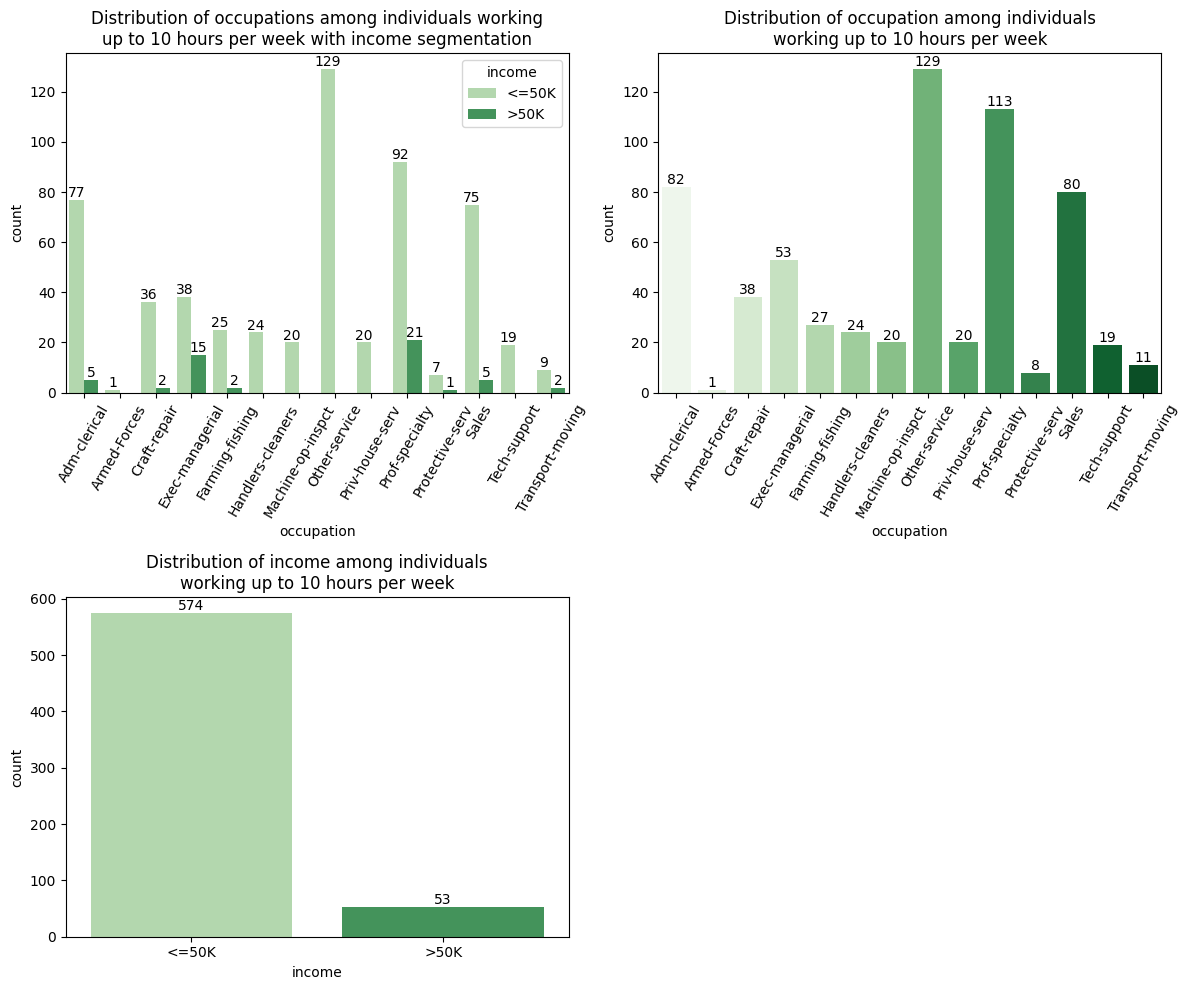

In [153]:
fig, axes = plt.subplots(2,2, figsize=(12,10))
fig.delaxes(axes[1,1])  # Usunięcie ostatniego subplotu

count_sth_grouped(df_train, 10, 'hours-per-week', 'occupation', 
                  title="Distribution of occupations among individuals working\nup to 10 hours per week with income segmentation",
                  relation='lower', hue_col="income", ax=axes[0,0])
count_sth_grouped(df_train, 10, 'hours-per-week', 'income', 
                  title="Distribution of income among individuals\nworking up to 10 hours per week",
                  relation='lower', ax=axes[1,0], rotat=0)

count_sth_grouped(df_train, 10, 'hours-per-week', 'occupation', 
                  title="Distribution of occupation among individuals\nworking up to 10 hours per week",
                  relation='lower', ax=axes[0,1], rotat=60)

plt.tight_layout()
save('hours10')

C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_p

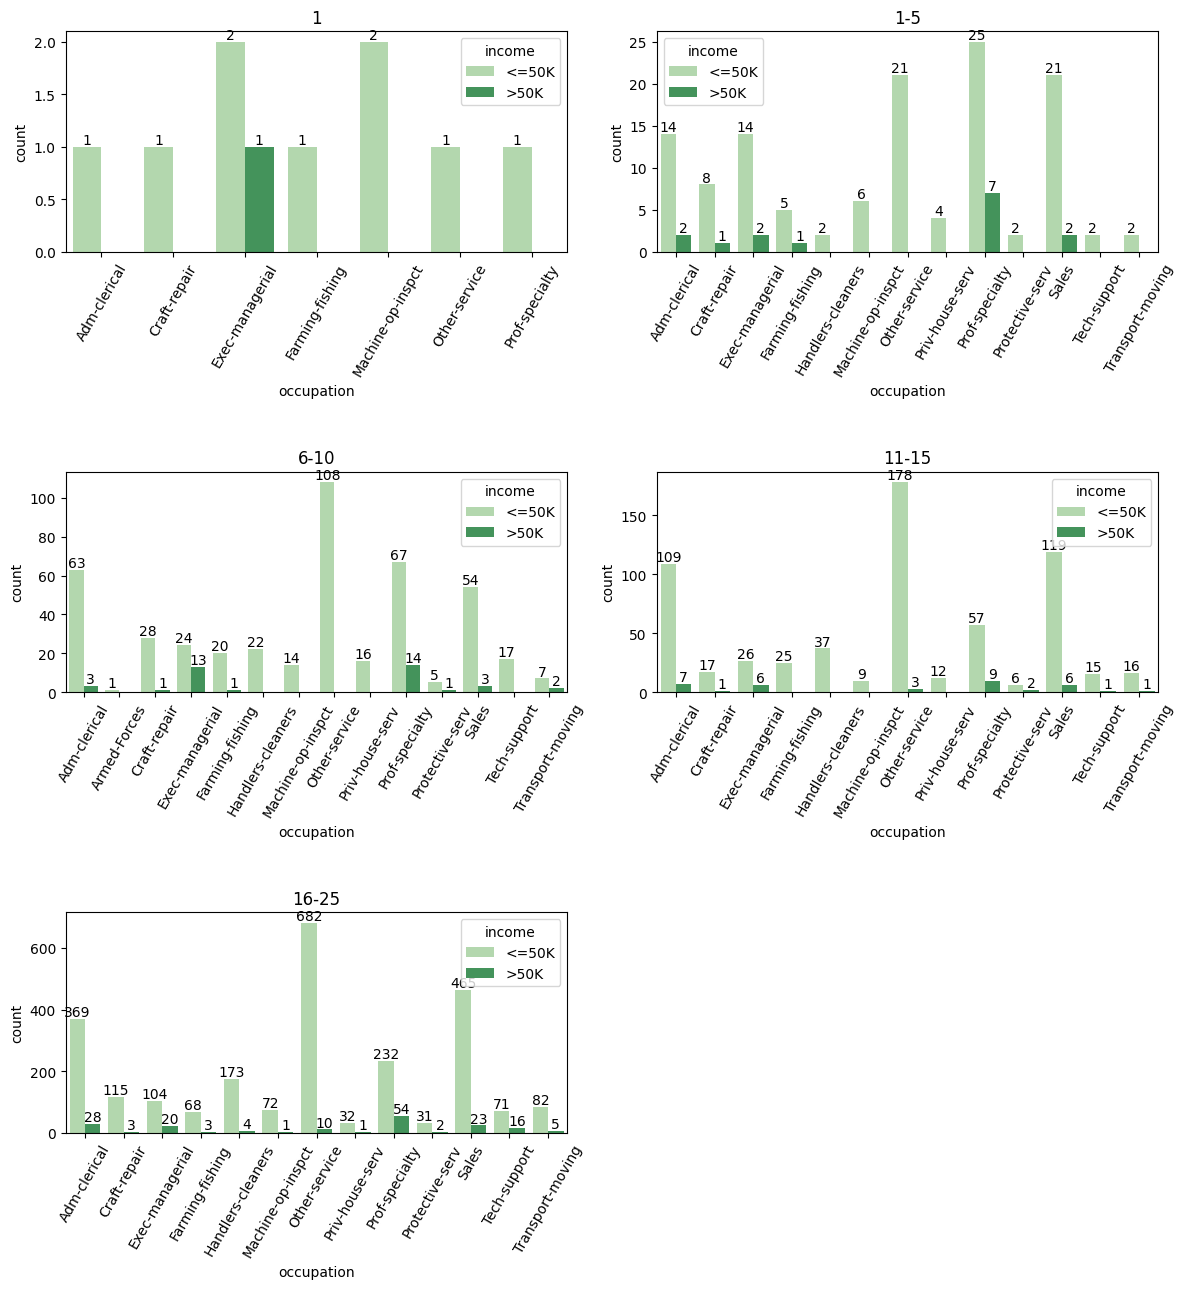

In [159]:
draw_subplots_low(df_train, "occupation",60, hue_col="income")
save('low_occup_sub')

C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_26920\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_p

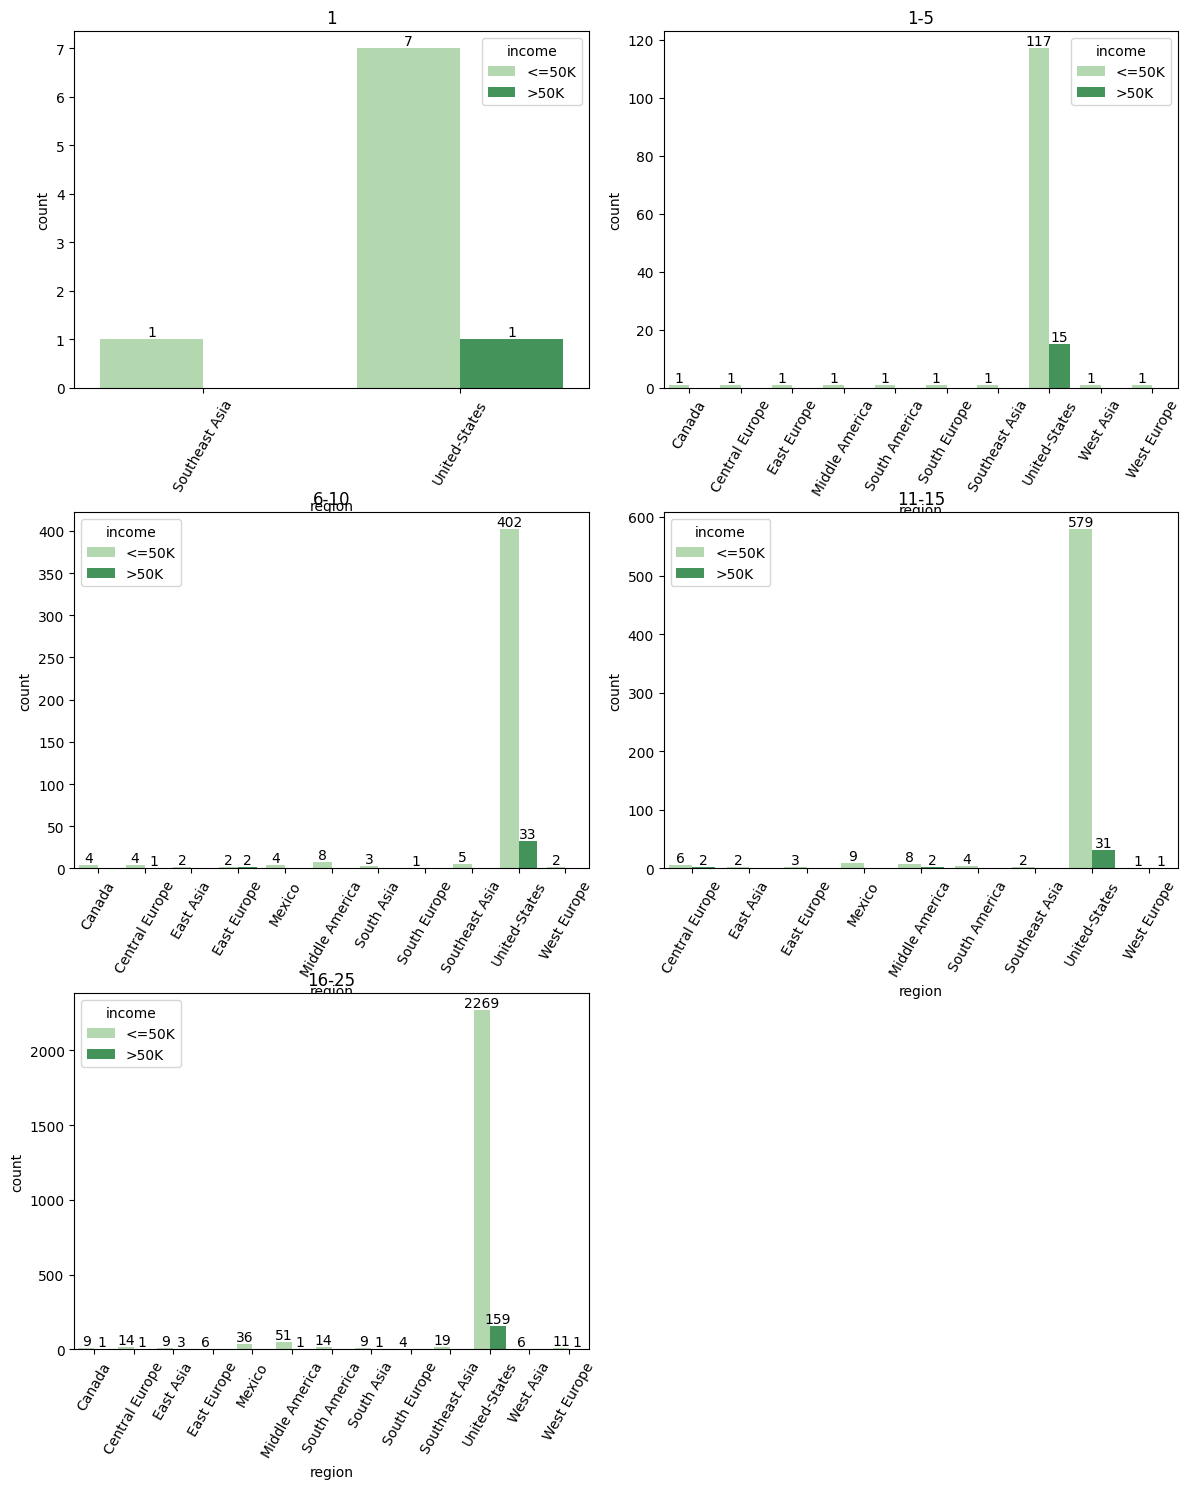

In [163]:
draw_subplots_low(df_train, "region",60, horiz_space=0.35, sub_height=15, hue_col="income")
save("region10.pdf")